In [1]:
#Here is the function to fetch data
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT="http://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH="datasets/housing"
HOUSING_URL=DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path=os.path.join(housing_path,"housing.tgz")#joining and creating the address
    urllib.request.urlretrieve(housing_url,tgz_path)#Retrieve a URL into a temporary location on disk
    #urllib.request.urlopen(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

In [2]:
fetch_housing_data() 

# functon to load data using pandas
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [3]:
#Quick look at the data structure
housing=load_housing_data()
housing.head()#shows the first few rows of data(top five rows)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


In [4]:
housing.info()
# info() method is useful to get a quick description of the data, in particular the total number of rows, and 
# each attributes type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [5]:
#ocean_proximity is a categorical attribute, value_counts() used to find what categories exist and how many districts
# belong to each category
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


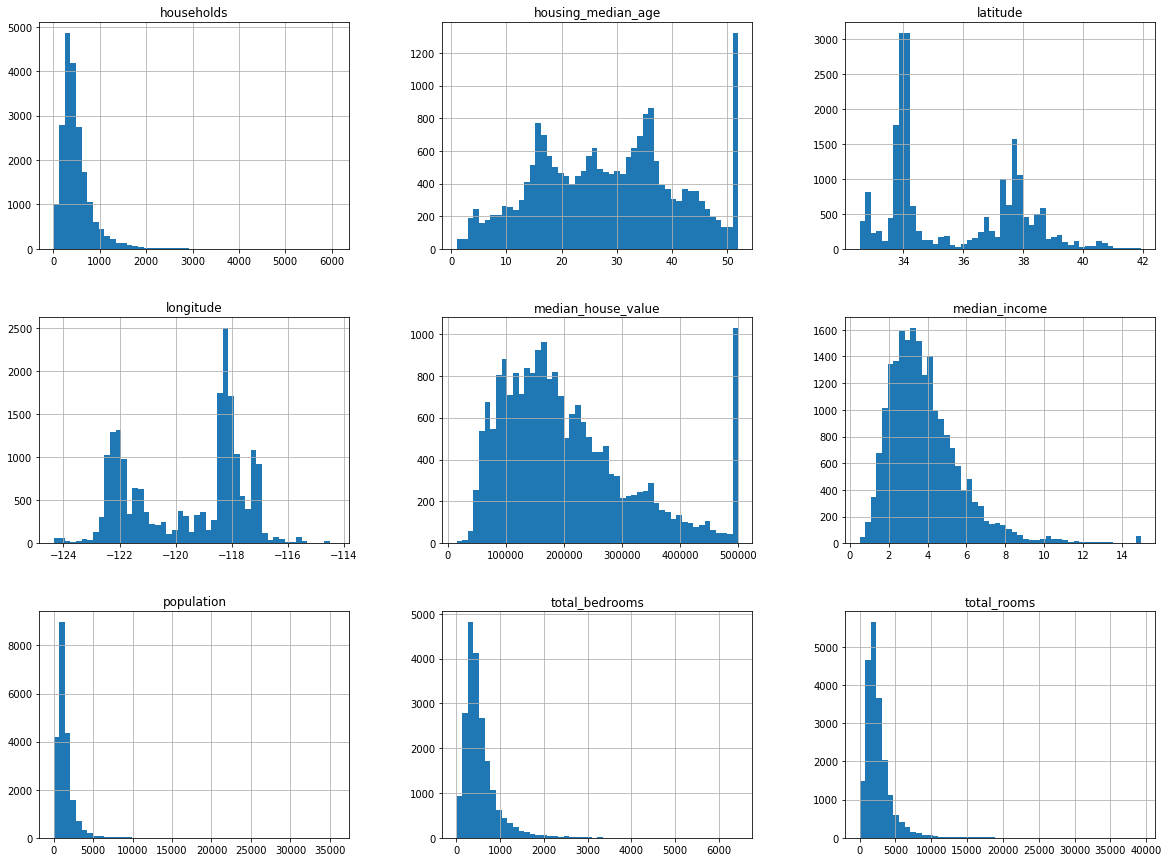

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [8]:
#CREATE A TEST SET
import numpy as np

def split_train_test(data,test_ratio):
    
    shuffled_indices=np.random.permutation(len(data))#shuffling the indices, the data instances may be
    #calculating the test set size using test_ratio
    test_set_size=int(len(data)*test_ratio)
    #slicing shuffled indices to set test and train set
    test_indices=shuffled_indices[:test_set_size]#this means all instances up to size(index) test_set_size
    train_indices=shuffled_indices[test_set_size:]# all instances from index test_set_size
    return data.iloc[train_indices],data.iloc[test_indices]#what is iloc?

train_set,test_set=split_train_test(housing,0.2) #creating train and test set using the above function
#print("Sizes of set\ntrain set :",len(train_set),"test_set:",len(test_set))
print(len(train_set),"train +",len(test_set),"test")

    

16512 train + 4128 test


In [9]:
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
#creates an income category,"income_cat" by dividing median_income by 1.5 (t odecrease the number of strata)
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)

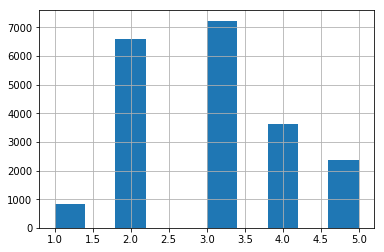

In [10]:
housing["income_cat"].hist()

In [11]:
#stratified sampline, based on income category, splitting into stratas(my_assump)
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [12]:
#count corresponding to different values
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [13]:
#lets see if thie worked(above splitting operations), 
# you can start by looking at the income category proportions in the full housing dataset
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [14]:
#Removing income_cat and getting data back to the original state

for set_ in(strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [15]:
#EXPLORING DATA

#only explore the training set
#if it is too large make a sample exploration set

# DISCOVER AND VISUALIZE THE DATA TO GAIN INSIGHTS

#make a copy of training set

housing=strat_train_set.copy()

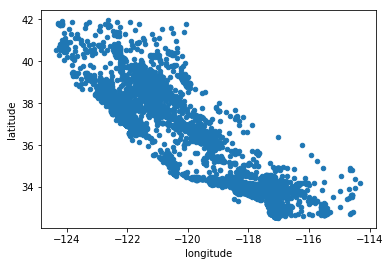

In [16]:
#create a scatter plot of (latitude and longitude)

housing.plot(kind="scatter",x="longitude",y="latitude")

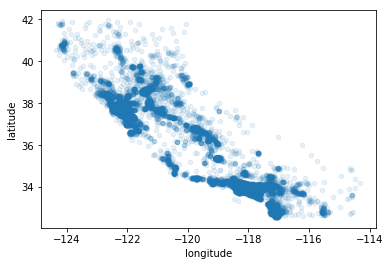

In [17]:
#setting alpha option =0.1 , 
#makes it much easier to visualize the places with high density of data points

housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)



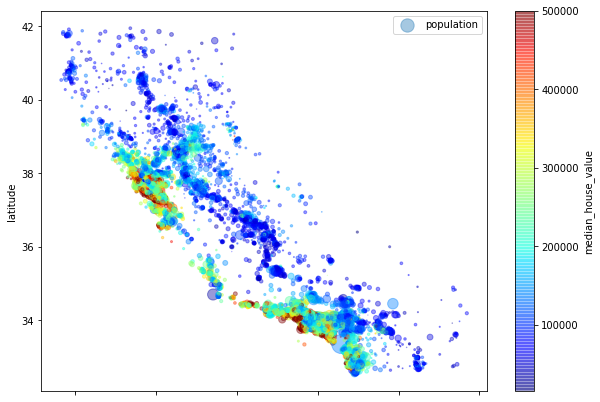

In [18]:
#looking at housing prices
#cmap- colored map, called jet
#blue(low value) to red(high value(price))

housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
            s=housing["population"]/100, label="population",figsize=(10,7),
            c="median_house_value",cmap=plt.get_cmap("jet"), colorbar=True
)
plt.legend()

In [19]:
# LOOKING FOR CORRELATIONS
#correlation coefficient shows how a pair of attributes related to each other
#calculate correlation b/w every pair of attritubes using corr() method

corr_matrix=housing.corr()

#how much each attribute correlated with median_house_value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [20]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda3c332f28>,
      dtype=object)

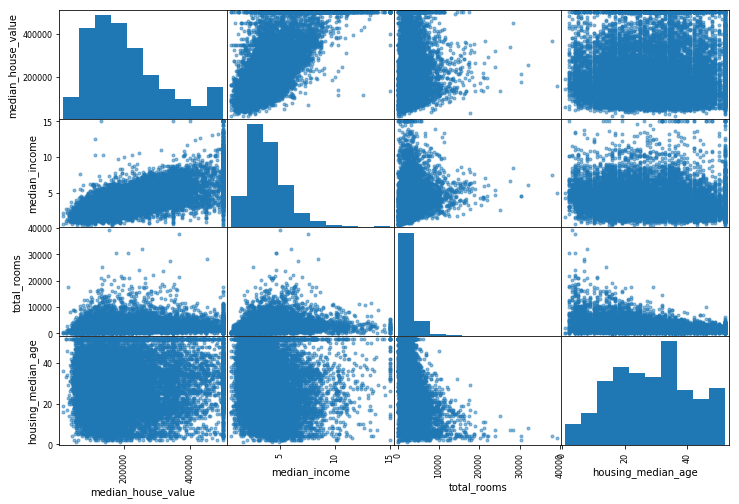

In [21]:
#Scatter plot using pandas

from pandas.tools.plotting import scatter_matrix

#promising attributes, most correlated with median housing value

attributes=["median_house_value","median_income","total_rooms","housing_median_age"]

scatter_matrix(housing[attributes],figsize=(12,8))

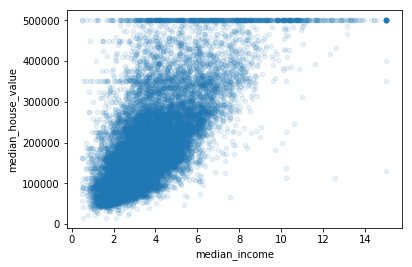

In [22]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [23]:
#Experimenting wih attribute combinations
#find(derive) useful attributes from existing

housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [24]:
corr_matrix=housing.corr()

In [25]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [26]:
###Prepare the Data for Machine Learning Algorithms

housing=strat_train_set.drop("median_house_value",axis=1)# removes median_house_value- since no transformations
# doing on that
housing_labels=strat_train_set["median_house_value"].copy()#labels for correspondin instances

In [27]:
housing.head()
#without median_house_value

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN
14650,-117.20,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN


In [28]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38,1568,351,710,339,2.7042,286600,<1H OCEAN
18632,-121.93,37.05,14,679,108,306,113,6.4214,340600,<1H OCEAN
14650,-117.20,32.77,31,1952,471,936,462,2.8621,196900,NEAR OCEAN
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,46300,INLAND
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,254500,<1H OCEAN


In [29]:
housing_labels.head()

17606    286600
18632    340600
14650    196900
3230      46300
3555     254500
Name: median_house_value, dtype: float64

In [30]:
#Data Cleaning
#Most machine learning algorithms cannot work with missing features
# see here total_bedrooms attribute has some missing values
# need to take care of that
housing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [31]:
#housing.dropna(subset=["total_bedrooms"])#opt 1
#housing.drop("total_bedrooms",axis=1)#opt 2
#median=housing["total_bedrooms"].median()#opt 3
#housing["total_bedrooms"].fillna(median,inplace=True)

In [32]:
#Replace attribute's missing values by using Scikit_learn class Imputer

#first make an instance of Imputer , specify that you want to replace missing values with median

from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

#create an instance

imputer=SimpleImputer(strategy="median")#replace with median, thats why strategy=median

#since median can only be calculated on numerical attributes , remove non_numerican attr, ocean_proximity

housing_num=housing.drop("ocean_proximity",axis=1)#made it all numerical

#fit imputer with the data

imputer.fit(housing_num)

#imputer stores the median value of all attributes in statistics_
#print(imputer.statistics_)     
#print(housing_num.median().values) Both will be same

#so now we can transform housing_num with the trained imputer
# thus in future, any attribute is updated with an empty value imputer will find it automatically

X=imputer.transform(housing_num)
# X will be a plain numpy array containing transformed features
#we can transform into a pandas DataFrame, if wanted
housing_tr=pd.DataFrame(X,columns=housing_num.columns)
housing_tr.info() #we see there is no empty values, all non-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


In [33]:
#Handling text and categorical attributes

from sklearn.preprocessing import LabelEncoder#to transform text labels to numbers

encoder=LabelEncoder()
housing_cat=housing["ocean_proximity"]
housing_cat_encoded=encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [34]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [35]:
#one-hot-encoder

from sklearn.preprocessing import OneHotEncoder

#makeing an instance of the encoder
encoder=OneHotEncoder()

housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot


/home/naveen/venv/local/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [36]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [37]:
#(text categories to integer categories to one-hot vectors) can be done 
# in one shot Using LabelBinarizer class

from sklearn.preprocessing import LabelBinarizer

#make an instance
encoder=LabelBinarizer()
#encoder=LabelBinarizer(sparse_output=True)
#since by default it returns a dense numpy array
# you can get a sparse output by passing sparse_output=True to LabelBinarizer constructor
housing_cat_1hot=encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [38]:
# Custom Transformers

#write your own tasks for such as custom cleanup operations or combining specific attributes

from sklearn.base import BaseEstimator, TransformerMixin #imports two base classes to inherit( as parent)

rooms_ix, bedrooms_ix, population_ix, household_ix=3,4,5,6 #initialized some index variables used inside the class

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):#its an attribute adder , class to add new attributes
    
    def __init__(self,add_bedrooms_per_room=True):# No *args or **kargs since loading BaseEstimator
        self.add_bedrooms_per_room=add_bedrooms_per_room
    
    def fit(self,X,y=None):
        return self # nothing else to do
    
    def transform(self,X,y=None): 
        rooms_per_household=X[:,rooms_ix]/X[:,household_ix]
        population_per_household=X[:,population_ix]/X[:,household_ix]
        
        if self.add_bedrooms_per_room:# if adding an additional attribute ,ie add_bedrooms_per_room=True
            bedrooms_per_room=X[:,bedrooms_ix]/X[:rooms_ix]
            return np.c_[X,rooms_per_household, population_per_household,bedrooms_per_room]
        else: #return the existing attributes
            return np.c_[X,rooms_per_household,population_per_household]

In [39]:
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)#which is default True, here makes an instance of class
housing_extra_attributes=attr_adder.transform(housing.values)
#housing_extra_attributes.shape

In [40]:
#numerical pupeline including the StandardScaler
# pipelines help with the sequence of transformation
# manually creates a structure of  transformations 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#num_pipeline=Pipeline([
    #the transformations to be done in order
    #('imputer',Imputer(strategy="median")),
#    ('imputer',SimpleImputer(strategy="median"))
#    ('attribs-adder',CombinedAttributesAdder()),
 #   ('std-scaler',StandardScaler()),
#])
#shown some errors
#housing_num_tr=num_pipeline.fit_transform(housing_num)

#feed pandas DataFrame directly into our pipeline

#creating a class for that operations with pandas DataFrames

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names=attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X[self.attribute_names].values

In [41]:
#updating num_pipeline with DataFrameSelector
num_attribs=list(housing_num)
cat_attribs=['ocean_proximity']

num_pipeline=Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer',SimpleImputer(strategy='median')),#using SimpleImputer instead of Imputer
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

cat_pipeline=Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('label_binarizer',LabelBinarizer()),
])



In [112]:
#join two pipelines into single pipeline using FeatureUnion class
# FeatureUnion class
from sklearn.pipeline import FeatureUnion

full_pipeline=FeatureUnion(transformer_list=[
    ("num_pipeline",num_pipeline),
    ("cat_pipeline",cat_pipeline),
])
#run full_pipeline
housing_prepared=full_pipeline.fit_transform(housing)


ValueError: operands could not be broadcast together with shapes (16512,) (3,8) 